In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [239]:
def read(input):
    # df = pd.read_csv(input, parse_dates=True, infer_datetime_format=True)  # use if there's only one date/time column
    try:
        df = pd.read_csv(input, parse_dates={'Datetime': [0, 1]},
                     infer_datetime_format=True)  # merges time and date columns
    except:
        df = pd.read_csv(input, names=["Datetime"])
    # print(df.head)
    return df


def denoise(ts: pd.DataFrame) -> None:
    """
    Removes noise from a time series. Produces a time series with less noise than
    the original one. This function can be implemented using moving (or rolling) media or median
    (included in the Pandas library.)
    """
    # Implementing 5 point moving average
    ts["Datetime"] = ts.rolling(window=5).mean()
    
def logarithm(ts):
    """
    Produces a time series whose elements are the logarithm of the original
    elements.
    """
    ts["Datetime"] = ts["Datetime"].apply(lambda x: math.log(x, 10))

In [245]:
df = read("../timeSeriesData/1_temperature_train.csv")
df2 = read("../timeSeriesData2/AtmPres2005NovMin.csv")
df2.head(10)
#df.plot(linewidth=2)

,Datetime,Station Pressure [mBar]
0,2005-11-01 00:00:00,817.46
1,2005-11-01 00:01:00,817.41
2,2005-11-01 00:02:00,817.29
3,2005-11-01 00:03:00,817.17
4,2005-11-01 00:04:00,817.18
5,2005-11-01 00:05:00,817.30
6,2005-11-01 00:06:00,817.43
7,2005-11-01 00:07:00,817.40
8,2005-11-01 00:08:00,817.34
9,2005-11-01 00:09:00,817.30


In [246]:
logarithm(df)
df.head(10)
#df.plot(linewidth=2)

,Datetime
0,1.269513
1,1.269513
2,1.276462
3,1.281033
4,1.292256
5,1.298853
6,1.307496
7,1.315970
8,1.324282
9,1.328380


<AxesSubplot:>

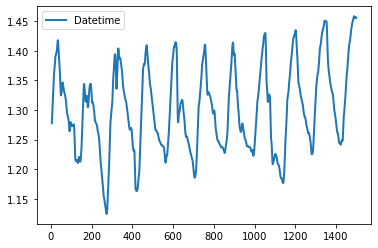

In [247]:
denoise(df)
#df.head(10)
df.plot(linewidth=2)